## 🚗 TripFare : Predicting Urban Taxi Fare with Machine Learning


Python Libaries + EDA + Visualization + ML +  Build a Streamlit UI 

1. Import necessary Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data=pd.read_csv('taxi_fare.csv')

In [10]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80


<h3 style='color:purple'> Understand the Dataset</h3>

In [13]:
data.shape

(212345, 18)

In [15]:
data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude', 'RatecodeID',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount'],
      dtype='object')

In [17]:
data.describe()

,VendorID,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000
mean,1.708338,1.766493,-73.112122,40.279405,1.034152,-73.144178,40.295648,1.324943,12.665588,0.048077,0.497662,1.809357,0.329049,0.299637,15.649355
std,0.454529,1.469647,7.936633,4.370714,0.494699,7.794599,4.293031,0.478255,10.875584,0.148103,0.037436,2.507419,2.028199,0.014094,13.592129
min,1.000000,0.000000,-121.933327,0.000000,1.000000,-121.933327,0.000000,1.000000,-52.000000,-0.500000,-0.500000,-2.700000,0.000000,-0.300000,-52.800000
25%,1.000000,1.000000,-73.990891,40.740292,1.000000,-73.990570,40.740089,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.300000
50%,2.000000,1.000000,-73.979469,40.755989,1.000000,-73.978691,40.755508,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.620000
75%,2.000000,2.000000,-73.963295,40.770283,1.000000,-73.964645,40.767475,2.000000,14.500000,0.000000,0.500000,2.360000,0.000000,0.300000,17.160000
max,2.000000,6.000000,0.000000,42.786934,99.000000,0.000000,42.786934,4.000000,819.500000,4.500000,0.500000,218.950000,661.080000,0.300000,832.800000


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212345 entries, 0 to 212344
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               212345 non-null  int64  
 1   tpep_pickup_datetime   212345 non-null  object 
 2   tpep_dropoff_datetime  212345 non-null  object 
 3   passenger_count        212345 non-null  int64  
 4   pickup_longitude       212345 non-null  float64
 5   pickup_latitude        212345 non-null  float64
 6   RatecodeID             212345 non-null  int64  
 7   store_and_fwd_flag     212345 non-null  object 
 8   dropoff_longitude      212345 non-null  float64
 9   dropoff_latitude       212345 non-null  float64
 10  payment_type           212345 non-null  int64  
 11  fare_amount            212345 non-null  float64
 12  extra                  212345 non-null  float64
 13  mta_tax                212345 non-null  float64
 14  tip_amount             212345 non-nu

In [21]:
data.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [23]:
data.duplicated().sum()

0

In [25]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80


### Preprocessing our dataset


In [28]:
# Ensure it's in datetime format
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])                                  

In [29]:
# Localize to UTC (raw data is in UTC)
data['tpep_pickup_datetime'] = data['tpep_pickup_datetime'].dt.tz_localize('UTC')
data['tpep_dropoff_datetime'] = data['tpep_dropoff_datetime'].dt.tz_localize('UTC')

# Convert to New York local time (EDT/EST, auto DST handling)
data['tpep_pickup_datetime'] = data['tpep_pickup_datetime'].dt.tz_convert('US/Eastern')
data['tpep_dropoff_datetime'] = data['tpep_dropoff_datetime'].dt.tz_convert('US/Eastern')



In [31]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-02-29 19:00:00-05:00,2016-02-29 19:07:55-05:00,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-02-29 19:00:00-05:00,2016-02-29 19:11:06-05:00,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-02-29 19:00:00-05:00,2016-02-29 19:31:06-05:00,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-02-29 19:00:00-05:00,2016-02-29 19:00:00-05:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-02-29 19:00:00-05:00,2016-02-29 19:00:00-05:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80


## Feature Engineering

In [34]:
## Used Haversine formula to calculate the distance between pickup and dropoff

In [36]:

def haversine_np(lon1, lat1, lon2, lat2):
    # Convert to radians
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6371.0 * c
    return km

# Apply vectorized haversine
data['trip_distance_km'] = haversine_np(
    data['pickup_longitude'],
    data['pickup_latitude'],
    data['dropoff_longitude'],
    data['dropoff_latitude']
)


In [38]:
## ccalculating the Trip duration in Minutes

data['trip_duration_min'] = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']).dt.total_seconds() / 60


In [40]:
# Calculating Pickup Hour, it is used for model predictin to find the rush hours

data['pickup_Hour']=pd.to_datetime(data['tpep_pickup_datetime']).dt.hour

In [42]:
# finding the weekend or not

data['is_weekend'] = data['tpep_pickup_datetime'].dt.dayofweek >= 5

In [44]:
data['is_weekend'].value_counts()

is_weekend
False    212345
Name: count, dtype: int64

In [46]:
# calulate whether trip is on AM or PM

data['am_pm'] = data['tpep_pickup_datetime'].dt.strftime('%p') 

In [47]:
# Calculate the trip is on night time or not

data['is_night'] = data['pickup_Hour'].apply(lambda x: 1 if (x >= 22 or x <= 5) else 0)

In [48]:
data['am_pm'].value_counts()

am_pm
AM    194727
PM     17618
Name: count, dtype: int64

In [49]:
data['is_night'].value_counts()

is_night
1    136842
0     75503
Name: count, dtype: int64

In [50]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_distance_km,trip_duration_min,pickup_Hour,is_weekend,am_pm,is_night
0,1,2016-02-29 19:00:00-05:00,2016-02-29 19:07:55-05:00,1,-73.976746,40.765152,1,N,-74.004265,40.746128,...,2.05,0.00,0.3,12.35,3.138096,7.916667,19,False,PM,0
1,1,2016-02-29 19:00:00-05:00,2016-02-29 19:11:06-05:00,1,-73.983482,40.767925,1,N,-74.005943,40.733166,...,3.05,0.00,0.3,15.35,4.303331,11.100000,19,False,PM,0
2,2,2016-02-29 19:00:00-05:00,2016-02-29 19:31:06-05:00,2,-73.782021,40.644810,1,N,-73.974541,40.675770,...,8.00,0.00,0.3,63.80,16.600142,31.100000,19,False,PM,0
3,2,2016-02-29 19:00:00-05:00,2016-02-29 19:00:00-05:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,...,3.78,5.54,0.3,41.62,9.046547,0.000000,19,False,PM,0
4,2,2016-02-29 19:00:00-05:00,2016-02-29 19:00:00-05:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,...,0.00,15.50,0.3,113.80,20.400022,0.000000,19,False,PM,0


In [51]:
data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude', 'RatecodeID',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'trip_distance_km', 'trip_duration_min', 'pickup_Hour', 'is_weekend',
       'am_pm', 'is_night'],
      dtype='object')

## Dropping and Handling the Irrelevant Datas

In [53]:
## dropping the uneccessary Columns
# ratecode=fare rules

In [55]:
data=data.drop(['VendorID','tpep_pickup_datetime','tpep_dropoff_datetime','pickup_longitude','pickup_latitude',
          'store_and_fwd_flag','dropoff_longitude','dropoff_latitude','fare_amount', 'extra', 'mta_tax', 
           'tip_amount','tolls_amount','improvement_surcharge'
          ], axis=1)

In [58]:
data.head()

,passenger_count,RatecodeID,payment_type,total_amount,trip_distance_km,trip_duration_min,pickup_Hour,is_weekend,am_pm,is_night
0,1,1,1,12.35,3.138096,7.916667,19,False,PM,0
1,1,1,1,15.35,4.303331,11.100000,19,False,PM,0
2,2,1,1,63.80,16.600142,31.100000,19,False,PM,0
3,3,1,1,41.62,9.046547,0.000000,19,False,PM,0
4,5,3,1,113.80,20.400022,0.000000,19,False,PM,0


In [65]:
data.describe()

,passenger_count,RatecodeID,payment_type,total_amount,trip_distance_km,trip_duration_min,pickup_Hour,is_night
count,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000
mean,1.766493,1.034152,1.324943,15.649355,25.156607,16.149813,5.724156,0.644432
std,1.469647,0.494699,0.478255,13.592129,435.567787,56.178587,4.877571,0.478686
min,0.000000,1.000000,1.000000,-52.800000,0.000000,-7174.583333,0.000000,0.000000
25%,1.000000,1.000000,1.000000,8.300000,1.155181,6.716667,3.000000,0.000000
50%,1.000000,1.000000,1.000000,11.620000,1.937586,11.266667,4.000000,1.000000
75%,2.000000,1.000000,2.000000,17.160000,3.565562,18.300000,6.000000,1.000000
max,6.000000,99.000000,4.000000,832.800000,8713.463111,1439.383333,23.000000,1.000000


### Here i have noticed some invalid datas are exist

* --> passenger_count min in 0 which is not possible

* --> RateCodeID max is 99

* --> total_amount, tirip_distance and Duration has the min values 0 and less than 0 which has to  be handled.

In [68]:
data['passenger_count'].value_counts()

passenger_count
1    149838
2     26371
5     14904
6     10328
3      7542
4      3353
0         9
Name: count, dtype: int64

### Remove Rows with passenger_count == 0

* Driver or data entry error: the driver forgot to enter the correct number or accidentally left it at 0.

* System defaults / missing input: when the value is missing, the system might default it to 0.

* Cancelling / aborted trip: maybe a trip record was initiated but no actual passenger ride occurred.

* Data cleaning / merging issues: when joining datasets or parsing, some rows may lose passenger info


In [71]:
## Removing anomalies

data=data[data['passenger_count']>0]

In [73]:
data['passenger_count'].value_counts()

passenger_count
1    149838
2     26371
5     14904
6     10328
3      7542
4      3353
Name: count, dtype: int64

In [75]:
data.shape

(212336, 10)

In [77]:
data[data['passenger_count']==0]

,passenger_count,RatecodeID,payment_type,total_amount,trip_distance_km,trip_duration_min,pickup_Hour,is_weekend,am_pm,is_night


#### RatecodeID --> remove unknownn 

* RatecodeID refers to a numeric code that indicates the fare structure applied to a particular trip. 
* This code is crucial for understanding how the fare was calculated, as different rate codes correspond to different pricing rules.
* 1 = Standard rate

* 2 = JFK Airport

* 3 = Newark Airport

* 4 = Nassau or Westchester

* 5 = Negotiated fare

* 6 = Group ride

* 99 = Null/unknown

In [80]:
data['RatecodeID'].value_counts()

RatecodeID
1     207479
2       3872
5        454
3        441
4         88
6          1
99         1
Name: count, dtype: int64

In [82]:
data[data['RatecodeID']==99]    #186066	

,passenger_count,RatecodeID,payment_type,total_amount,trip_distance_km,trip_duration_min,pickup_Hour,is_weekend,am_pm,is_night
186066,1,99,2,3.3,0.714212,22.916667,5,False,AM,1


In [84]:
# Removing anomalies

data=data[data['RatecodeID'] != 99]

In [86]:
## cross-check

data[data['RatecodeID']==99]

,passenger_count,RatecodeID,payment_type,total_amount,trip_distance_km,trip_duration_min,pickup_Hour,is_weekend,am_pm,is_night


In [87]:
data['RatecodeID'].value_counts()

RatecodeID
1    207479
2      3872
5       454
3       441
4        88
6         1
Name: count, dtype: int64

### trip_duration_min

In [92]:
(data['trip_duration_min']<=0).value_counts()

trip_duration_min
False    212204
True        131
Name: count, dtype: int64

In [94]:
data[data['trip_duration_min']<=0]

,passenger_count,RatecodeID,payment_type,total_amount,trip_distance_km,trip_duration_min,pickup_Hour,is_weekend,am_pm,is_night
3,3,1,1,41.62,9.046547,0.0,19,False,PM,0
4,5,3,1,113.80,20.400022,0.0,19,False,PM,0
5,5,1,1,30.36,6.502273,0.0,19,False,PM,0
6,6,1,2,24.30,8666.430067,0.0,19,False,PM,0
20904,1,1,2,3.30,5.205408,0.0,3,False,AM,1
...,...,...,...,...,...,...,...,...,...,...
209583,1,1,2,12.30,8667.492745,0.0,7,False,AM,0
209846,1,1,2,9.30,8647.057715,0.0,7,False,AM,0
209992,4,1,2,3.80,8667.179484,0.0,7,False,AM,0
211663,1,1,2,3.30,8665.702916,0.0,7,False,AM,0


### Possible Reasons for Zero Trip Durations with Non-Zero Fare and Distance

* <b>System Errors or Glitches</b>: Technical issues during data recording can result in trips with zero durations but valid fares and distances.

* <b>Trip Cancellations:</b> Passengers may cancel trips before they commence, leading to zero durations.
The fare and distance might still be recorded due to system delays or errors.

* <b>Data Entry Mistakes:</b> Human errors during data input can introduce zero durations while maintaining other fields.

* <b>Unusual Trip Patterns:</b> In rare cases, such as immediate cancellations, the system might record a zero duration.
The fare and distance could be incorrectly logged due to system behavior.


As a data scientist, it's advisable to remove records with zero trip durations, especially when they have non-zero fares and distances.

These entries are likely data anomalies resulting from system errors, cancellations, or data entry mistakes, and they can skew your analyses and model performance.

In [92]:
# Removing anomalies

data=data[data['trip_duration_min'] > 0]

In [94]:
# Cross-check

data[data['trip_duration_min']<=0]

,passenger_count,RatecodeID,payment_type,total_amount,trip_distance_km,trip_duration_min,pickup_Hour,is_weekend,am_pm,is_night


### Total_amount

In [97]:
(data['total_amount']<=0).value_counts()

total_amount
False    212064
True        140
Name: count, dtype: int64

#### Possiblities of Negative or Zero's in total_amount Values

* Trip Cancellations: Passengers may cancel trips before they commence, leading to zero durations. 

* Refunds or Adjustments: Negative fare amounts can occur when a fare is refunded or adjusted due to overcharging, disputes, or corrections. 

* Data Entry Mistakes: Human errors during data input can introduce zero or negative values in the total_amount field.



In [99]:
data[data['total_amount']<=0]

,passenger_count,RatecodeID,payment_type,total_amount,trip_distance_km,trip_duration_min,pickup_Hour,is_weekend,am_pm,is_night
354,5,1,2,0.00,0.006491,0.050000,2,False,AM,1
407,1,1,3,-6.30,0.739515,5.316667,2,False,AM,1
1119,1,1,3,-3.30,20.632740,90.966667,2,False,AM,1
1309,1,1,2,0.00,0.001064,2.050000,2,False,AM,1
2231,1,1,3,-10.14,1.359916,8.050000,2,False,AM,1
...,...,...,...,...,...,...,...,...,...,...
203293,2,1,4,-3.30,0.021398,0.750000,6,False,AM,0
204041,1,1,2,-3.80,0.114785,1.016667,6,False,AM,0
208970,1,1,4,-6.30,0.539684,6.300000,7,False,AM,0
209202,1,1,4,-5.30,0.581891,3.966667,7,False,AM,0


#### As a data scientist

* To Remove:

Remove them if you're training a fare prediction model (since they're not helpful for generalization)

* Analyze Separately:

If you're interested in studying taxi behavior, fraud detection, or system issues,
these anomalies can be analyzed separately to gain insights into such occurrences.

In [102]:
# Removing anomalies

data=data[data['total_amount']>0]

In [104]:
# cross- check  

data[data['total_amount']<=0]

,passenger_count,RatecodeID,payment_type,total_amount,trip_distance_km,trip_duration_min,pickup_Hour,is_weekend,am_pm,is_night


### Trip_distance

In [107]:
data[data['trip_distance_km']<=0]

,passenger_count,RatecodeID,payment_type,total_amount,trip_distance_km,trip_duration_min,pickup_Hour,is_weekend,am_pm,is_night
95,1,1,1,8.80,0.0,8.583333,19,False,PM,0
116,1,1,1,16.62,0.0,10.966667,19,False,PM,0
129,3,5,2,59.14,0.0,39.050000,19,False,PM,0
365,2,1,1,44.64,0.0,24.433333,2,False,AM,1
478,1,3,1,98.16,0.0,30.850000,2,False,AM,1
...,...,...,...,...,...,...,...,...,...,...
212064,1,1,3,15.80,0.0,20.500000,7,False,AM,0
212086,1,1,2,6.30,0.0,6.116667,7,False,AM,0
212209,1,1,2,11.30,0.0,13.100000,7,False,AM,0
212228,1,1,1,8.15,0.0,4.883333,7,False,AM,0


#### Possible Reasons for Zero Trip Distance

* Passenger Cancellations: The passenger may have canceled the ride after entering the taxi, resulting in a non-zero duration but zero distance. 
dracodoc.github.io

* System Errors or Glitches: Technical issues during data recording can lead to trips with zero distances but non-zero durations. 
Analytics Vidhya

* Data Entry Mistakes: Human errors during data input can introduce zero distances while maintaining other fields.

In [111]:
# Removing negative and 0 values from trip distance

data=data[data['trip_distance_km']>0]

In [113]:
# cross checking is there any below 0

data[data['trip_distance_km']<=0]


,passenger_count,RatecodeID,payment_type,total_amount,trip_distance_km,trip_duration_min,pickup_Hour,is_weekend,am_pm,is_night


In [115]:
data['payment_type'].value_counts()

payment_type
1    142248
2     66371
3       352
4       131
Name: count, dtype: int64

In [117]:
data['pickup_Hour'].value_counts()

pickup_Hour
3     32911
4     30227
2     27922
5     26181
6     26065
7     14909
1     10170
8     10080
9      9732
19     6910
20     4083
0      3631
21     2561
23     1885
22     1835
Name: count, dtype: int64

In [119]:
data['is_weekend'].value_counts()

is_weekend
False    209102
Name: count, dtype: int64

##### Drop is_weekend feature
* Here, there is no Weekend, all are weekday.

* |Therefore no use of keeping this column. so here dropping is_weekend column

In [123]:
data=data.drop('is_weekend', axis=1)

In [125]:
data

,passenger_count,RatecodeID,payment_type,total_amount,trip_distance_km,trip_duration_min,pickup_Hour,am_pm,is_night
0,1,1,1,12.35,3.138096,7.916667,19,PM,0
1,1,1,1,15.35,4.303331,11.100000,19,PM,0
2,2,1,1,63.80,16.600142,31.100000,19,PM,0
7,1,1,3,21.80,7.950066,16.050000,19,PM,0
8,1,1,1,8.80,0.837395,4.983333,19,PM,0
...,...,...,...,...,...,...,...,...,...
212340,1,1,1,20.16,3.806279,23.266667,7,AM,0
212341,1,1,1,18.30,3.496576,22.750000,7,AM,0
212342,1,1,1,4.80,0.580119,2.683333,7,AM,0
212343,2,1,2,7.80,1.555737,7.150000,7,AM,0


In [127]:
data['am_pm'].value_counts()

am_pm
AM    191828
PM     17274
Name: count, dtype: int64

In [129]:
data['is_night'].value_counts()

is_night
1    134762
0     74340
Name: count, dtype: int64

In [131]:
data.shape

(209102, 9)

In [133]:
data.isnull().sum()

passenger_count      0
RatecodeID           0
payment_type         0
total_amount         0
trip_distance_km     0
trip_duration_min    0
pickup_Hour          0
am_pm                0
is_night             0
dtype: int64

In [135]:
data.duplicated().sum()

0

In [137]:
data.head()

,passenger_count,RatecodeID,payment_type,total_amount,trip_distance_km,trip_duration_min,pickup_Hour,am_pm,is_night
0,1,1,1,12.35,3.138096,7.916667,19,PM,0
1,1,1,1,15.35,4.303331,11.100000,19,PM,0
2,2,1,1,63.80,16.600142,31.100000,19,PM,0
7,1,1,3,21.80,7.950066,16.050000,19,PM,0
8,1,1,1,8.80,0.837395,4.983333,19,PM,0


### Visualizing the Dataset

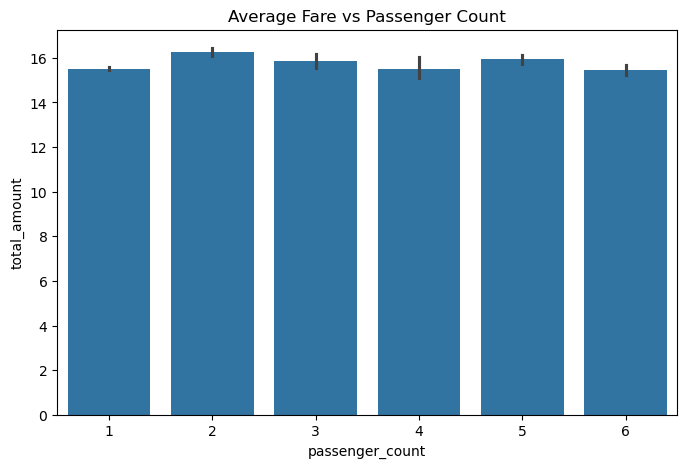

In [141]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(x='passenger_count', y='total_amount', data=data, estimator='mean')
plt.title('Average Fare vs Passenger Count')
plt.show()


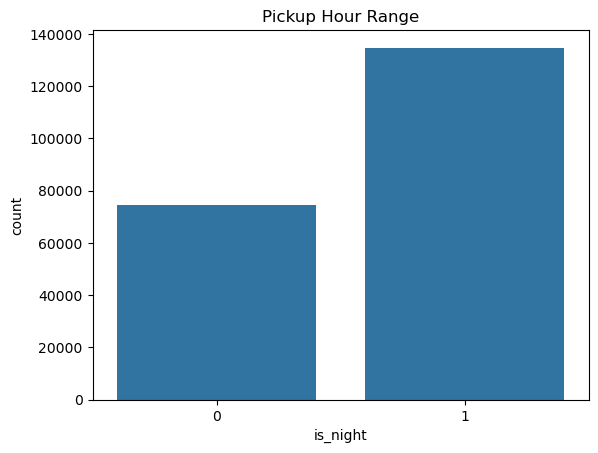

In [159]:
sns.countplot(data=data, x='is_night')
plt.title('Pickup Hour Range')
plt.show()

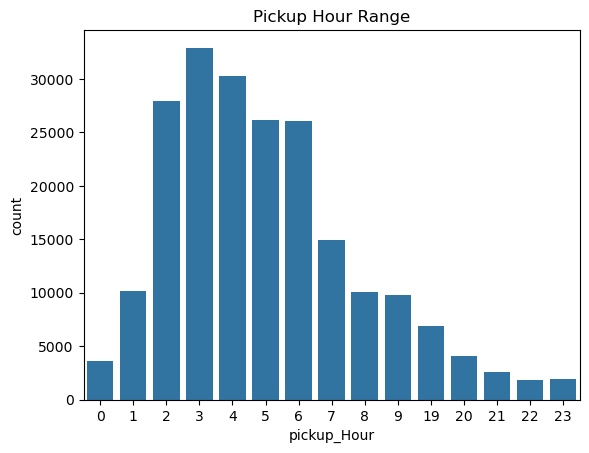

In [142]:
sns.countplot(data=data, x='pickup_Hour')
plt.title('Pickup Hour Range')
plt.show()

When you add normalize=True, instead of giving absolute counts, it gives relative frequencies (proportions)
So using the same example [1,1,2,1,3,2,2] (total 7 entries):

For value 1 → 3/7 ≈ 0.4286

For value 2 → 3/7 ≈ 0.4286

For value 3 → 1/7 ≈ 0.1429

This is useful when you want to see relative distribution (percentages / proportions), not raw counts.
For example, to compare across groups of different sizes.


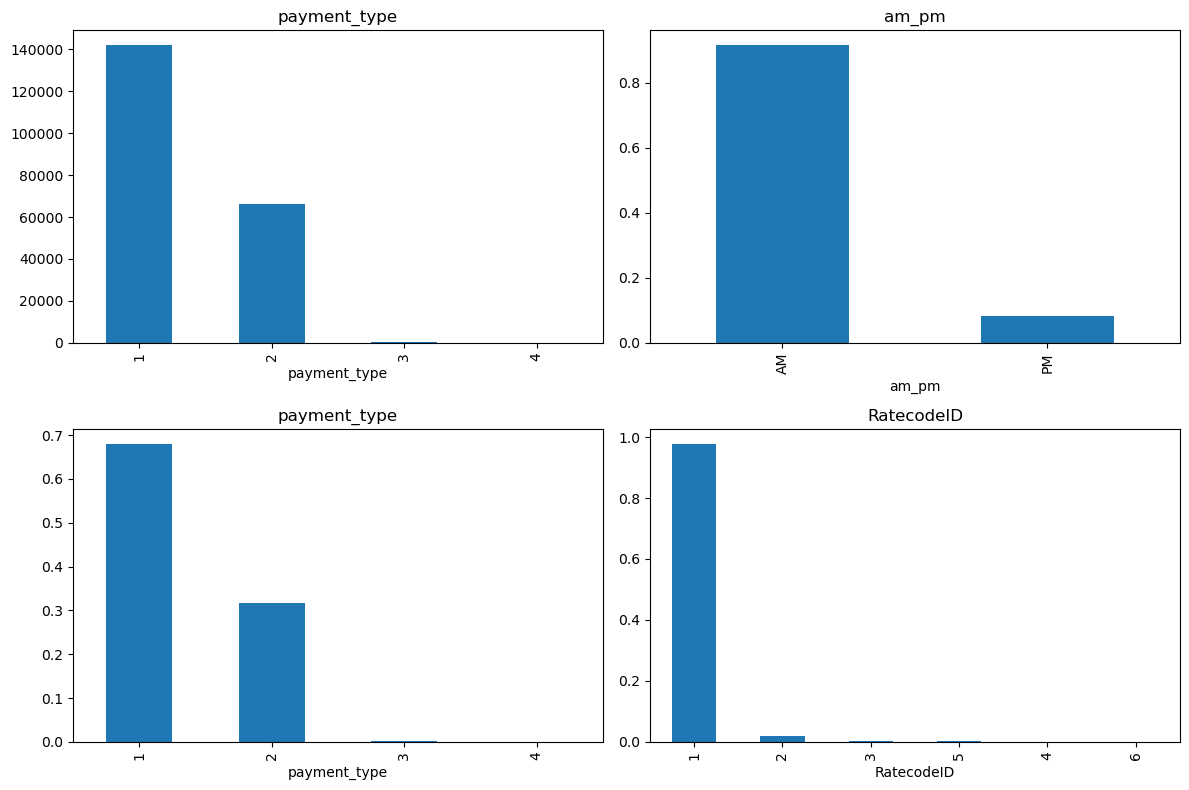

In [145]:
import matplotlib.pyplot as plt

# Set up subplot grid: 2 rows × 2 columns so 4 plots
plt.figure(figsize=(12, 8))

# 1st subplot
plt.subplot(221)   # 2 rows, 2 cols, position 1 (top-left)
data['payment_type'].value_counts().plot.bar()
plt.title('payment_type')

# 2nd subplot
plt.subplot(222)   # position 2 (top-right)
data['am_pm'].value_counts(normalize=True).plot.bar()
plt.title('am_pm')

# 3rd subplot
plt.subplot(223)   # position 3 (bottom-left)
data['payment_type'].value_counts(normalize=True).plot.bar()
plt.title('payment_type')

# 4th subplot
plt.subplot(224)   # position 4 (bottom-right)
data['RatecodeID'].value_counts(normalize=True).plot.bar()
plt.title('RatecodeID')

plt.tight_layout()   # adjust spacing so titles/axes don’t overlap
plt.show()


The hue parameter is used in Seaborn visualizations to add an extra categorical dimension

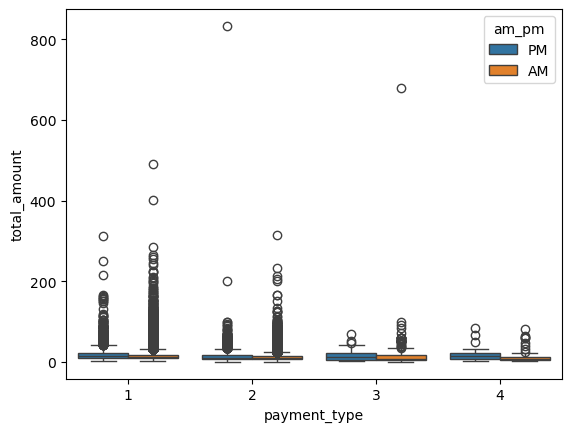

In [152]:
# Boxplot of total_amount by payment_type, colored by am_pm

sns.boxplot(x='payment_type', y='total_amount', hue='am_pm', data=data)
plt.show()


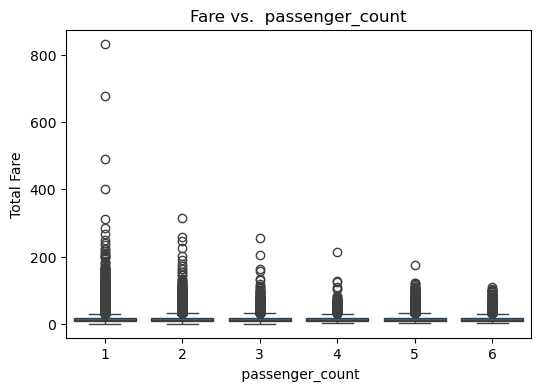

In [156]:
plt.figure(figsize=(6,4))
sns.boxplot(x='passenger_count', y='total_amount', data=data)
plt.title('Fare vs.  passenger_count')
plt.xlabel(' passenger_count')
plt.ylabel('Total Fare')
plt.show()


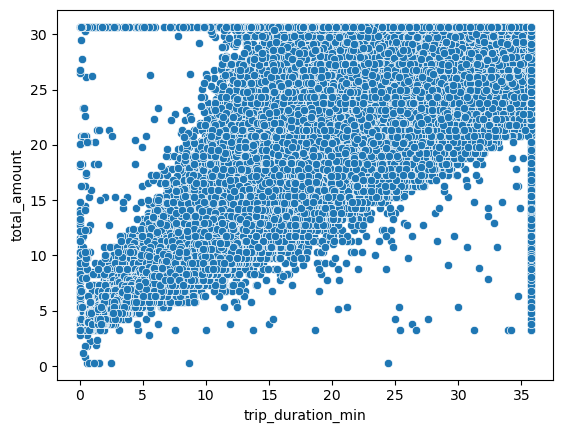

In [198]:
sns.scatterplot(x=data['trip_duration_min'], y=data['total_amount'])
plt.show()

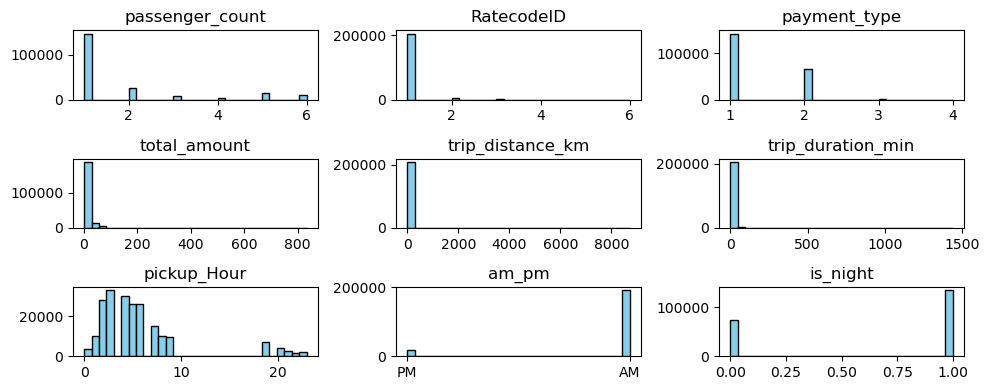

In [158]:
plt.figure(figsize=(10, 4))
for i, col in enumerate(data, 1):
    plt.subplot(3, 3, i)  # Adjust grid size as needed
    plt.hist(data[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f"{col}")
plt.tight_layout()
plt.show()

In [160]:
data.head(2)

,passenger_count,RatecodeID,payment_type,total_amount,trip_distance_km,trip_duration_min,pickup_Hour,am_pm,is_night
0,1,1,1,12.35,3.138096,7.916667,19,PM,0
1,1,1,1,15.35,4.303331,11.100000,19,PM,0


In [169]:
continuous_cols=['total_amount','trip_distance_km','trip_duration_min']

In [171]:
for i in continuous_cols:
    print(f'{i} skweness is:{data[i].skew()}')

total_amount skweness is:5.1668760021290385
trip_distance_km skweness is:22.494630199655973
trip_duration_min skweness is:24.468095019023856


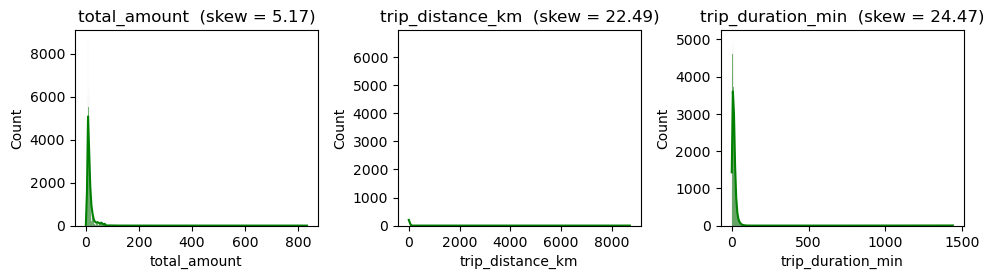

In [173]:
plt.figure(figsize=(10,5))
for i,col in enumerate(continuous_cols,1):
    plt.subplot(2,3,i)
    sns.histplot(data[col], kde=True, color='green', edgecolor='black')
    plt.title(f'{col}  (skew = {data[col].skew():.2f})')
plt.tight_layout()
plt.show()


#### Outlier detection/treatment in the statistical sense is meant for continuous numeric variables.
#### For discrete or categorical features, you simply look for invalid or rare values, not “outliers” in the distributional sense.

* There’s no “tail” to speak of.
* 
– You can still check for data quality errors (e.g., 99 passengers).

In [181]:
data.sample()

,passenger_count,RatecodeID,payment_type,total_amount,trip_distance_km,trip_duration_min,pickup_Hour,am_pm,is_night
2384,1,1,1,12.8,1.759509,13.15,2,AM,1


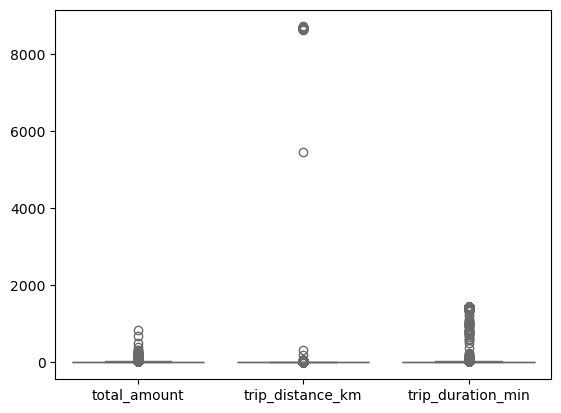

In [183]:
sns.boxplot(data=data[['total_amount','trip_distance_km','trip_duration_min']],palette = 'Set3')
plt.show()

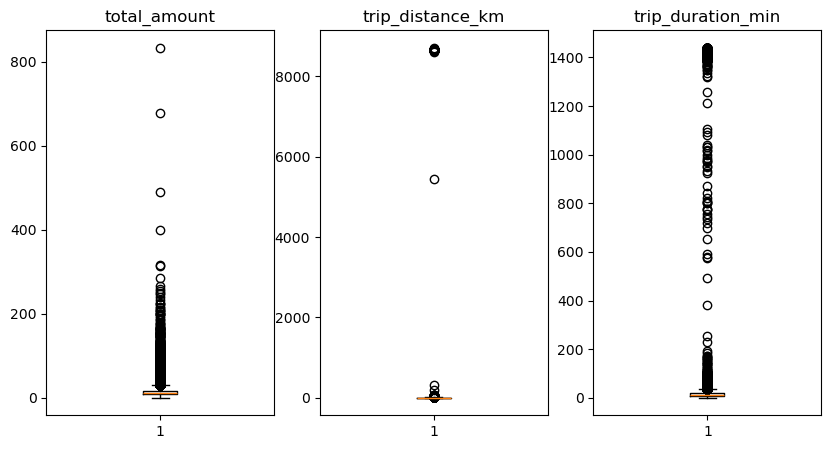

In [187]:
plt.figure(figsize=(10,5))
for i, col in enumerate(['total_amount','trip_distance_km','trip_duration_min']):
    plt.subplot(1,3,i+1)
    plt.boxplot(data[col])
    plt.title(col)
plt.show()

## Outlier Detection

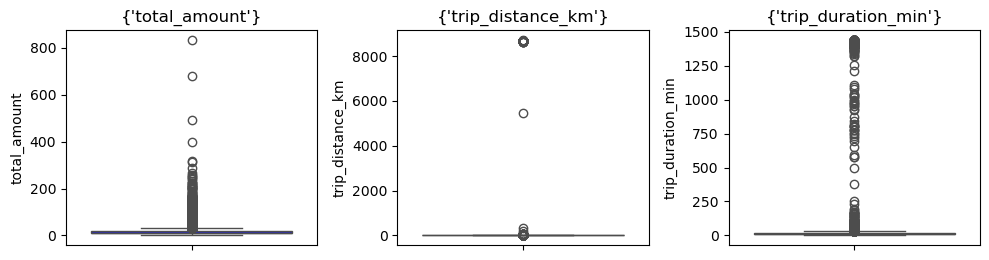

In [189]:

plt.figure(figsize=(10,5))
for i,col in enumerate(continuous_cols,1):
    plt.subplot(2,3,i)
    sns.boxplot(data[col], color='blue')
    plt.title({col})
plt.tight_layout()
plt.show()


### Handling Outlier


   * Caps outliers in specified continuous columns using the IQR method.
   * Values below Q1 - 1.5*IQR are set to the lower fence,
    and values above Q3 + 1.5*IQR are set to the upper fence.


In [192]:

for col in continuous_cols:

    Q1 = data[col].quantile(0.25)  # 25th percentile
    Q3 = data[col].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range

    # Define lower and upper bound
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values at lower and upper bound
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])

In [196]:
print(upper_bound) # for trip_duration_min
print(lower_bound)

35.72500000000001
-10.608333333333338


In [206]:
data[data['trip_duration_min']==35]

,passenger_count,RatecodeID,payment_type,total_amount,trip_distance_km,trip_duration_min,pickup_Hour,am_pm,is_night
23666,1,1,1,30.675,6.596084,35.0,4,AM,1
25553,3,1,2,30.675,7.233010,35.0,4,AM,1
31050,1,1,2,22.300,3.144882,35.0,4,AM,1
32401,1,3,1,30.675,7.233010,35.0,5,AM,1
37391,5,1,1,30.675,7.233010,35.0,5,AM,1
66655,1,1,2,30.675,7.233010,35.0,8,AM,0
67503,1,1,1,30.675,1.782335,35.0,8,AM,0
85557,1,1,2,30.675,7.233010,35.0,22,PM,1
92005,1,2,1,30.675,7.233010,35.0,0,AM,1
92630,3,1,1,30.675,7.233010,35.0,1,AM,1


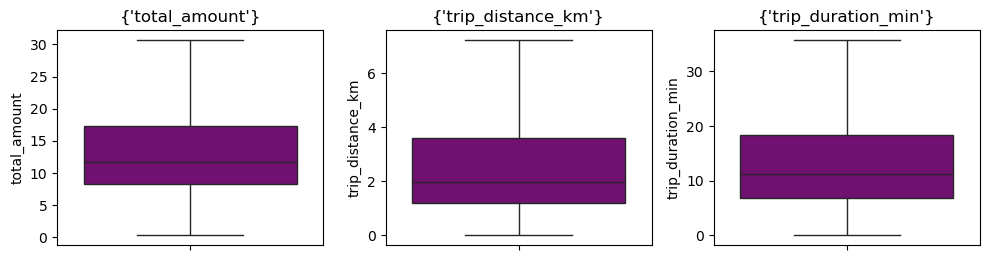

In [210]:

plt.figure(figsize=(10,5))
for i,col in enumerate(continuous_cols,1):
    plt.subplot(2,3,i)
    sns.boxplot(data[col], color='purple')
    plt.title({col})
plt.tight_layout()
plt.show()


## Feature Transformation

#### After handling Outlieres, Checking the Skweness of the continuous data

In [213]:
for i in continuous_cols:
    print(f'{i} skweness is:{data[i].skew()}')

total_amount skweness is:1.0482953514883049
trip_distance_km skweness is:1.0981943340675244
trip_duration_min skweness is:0.9629861518320274


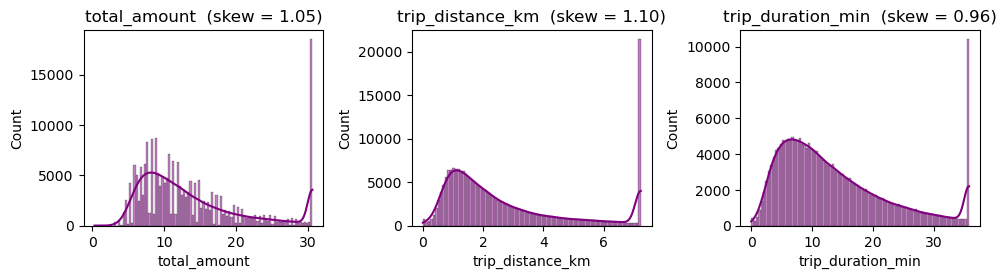

In [217]:

plt.figure(figsize=(10,5))
for i,col in enumerate(continuous_cols,1):
    plt.subplot(2,3,i)
    sns.histplot(data[col], kde=True, color='purple', edgecolor='black')
    plt.title(f'{col}  (skew = {data[col].skew():.2f})')
plt.tight_layout()
plt.show()


### Apply log transformation as the datas are positively skewed

### Purpose of Transformation

Adjust the distribution of <b>continuous numeric data</b> so statistical assumptions hold and model performance improves.

* Transformations (log, square root, Box-Cox) are meant to:

* Reduce skewness in continuous variables,

* Stabilize variance,

* Make data closer to normal for linear modeling.

Those goals assume the data can take any real value within a range—not just a few discrete counts.

#### Numeric features to examine for skewness

* total_amount – Target variable, but check and possibly transform if the distribution is highly skewed.

* trip_distance_km – Continuous distance measure; outliers and skewness can strongly affect models.

* trip_duration_min – Continuous time variable; same reasoning as distance.

Optional numeric feature  --> passenger_count--> skewness correction is usually unnecessary(Technically numeric but it’s a small-range integer (0–6)

#### Why not the others

* RatecodeID, payment_type, VendorID, am_pm, is_night, pickup_Hour → Categorical or small-range discrete identifiers.
  
* Skewness measures distribution shape for continuous data, so applying it here is meaningless.

* Categorical or small-range discrete variables (like passenger_count or payment_type) – their “shape” isn’t continuous, so skewness fixes don’t mean anything.

In [222]:
# applying log transformation
#np.log1p(x)-->  used to handle zeros safely 
#if np.log(0)  is undefined--> gives -inf.   so np.log1p(0)--> log(1+0)=0

data[continuous_cols]=data[continuous_cols].apply(lambda x: np.log1p(x))

In [224]:
data.head()

,passenger_count,RatecodeID,payment_type,total_amount,trip_distance_km,trip_duration_min,pickup_Hour,am_pm,is_night
0,1,1,1,2.591516,1.420236,2.187922,19,PM,0
1,1,1,1,2.794228,1.668335,2.493205,19,PM,0
2,2,1,1,3.455528,2.108152,3.468856,19,PM,0
7,1,1,3,3.126761,2.108152,2.836150,19,PM,0
8,1,1,1,2.282382,0.608349,1.788978,19,PM,0


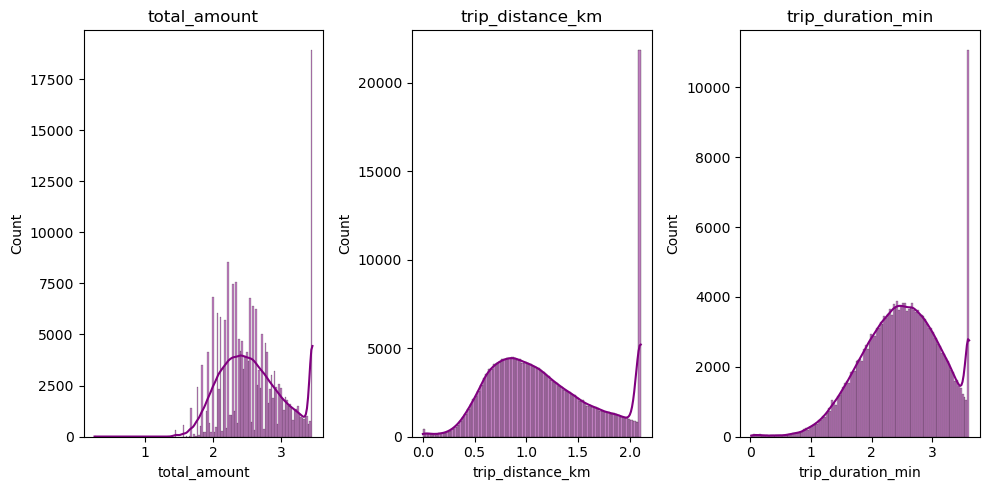

In [226]:
plt.figure(figsize=(10,5))
for i, col in enumerate(continuous_cols,1):
    plt.subplot(1,3,i)
    sns.histplot(data[col], kde=True, color='purple')
    plt.title(f'{col}')
plt.tight_layout()
plt.show()

In [ ]:
# Check skewness after Transformation

In [230]:
for i in continuous_cols:
    print(f' {i} Skweness is : {data[i].skew()}')

 total_amount Skweness is : 0.29439817731273077
 trip_distance_km Skweness is : 0.40061880217831775
 trip_duration_min Skweness is : -0.280325401798032


In [234]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209102 entries, 0 to 212344
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   passenger_count    209102 non-null  int64  
 1   RatecodeID         209102 non-null  int64  
 2   payment_type       209102 non-null  int64  
 3   total_amount       209102 non-null  float64
 4   trip_distance_km   209102 non-null  float64
 5   trip_duration_min  209102 non-null  float64
 6   pickup_Hour        209102 non-null  int32  
 7   am_pm              209102 non-null  object 
 8   is_night           209102 non-null  int64  
dtypes: float64(3), int32(1), int64(4), object(1)
memory usage: 15.2+ MB


## Encoding 

In [237]:
data['am_pm']

0         PM
1         PM
2         PM
7         PM
8         PM
          ..
212340    AM
212341    AM
212342    AM
212343    AM
212344    AM
Name: am_pm, Length: 209102, dtype: object

In [239]:
data['am_pm']=data['am_pm'].replace({'AM':0, 'PM':1})

C:\Users\Ajay\AppData\Local\Temp\ipykernel_13228\1277018107.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['am_pm']=data['am_pm'].replace({'AM':0, 'PM':1})


In [241]:
data.head()

,passenger_count,RatecodeID,payment_type,total_amount,trip_distance_km,trip_duration_min,pickup_Hour,am_pm,is_night
0,1,1,1,2.591516,1.420236,2.187922,19,1,0
1,1,1,1,2.794228,1.668335,2.493205,19,1,0
2,2,1,1,3.455528,2.108152,3.468856,19,1,0
7,1,1,3,3.126761,2.108152,2.836150,19,1,0
8,1,1,1,2.282382,0.608349,1.788978,19,1,0


In [261]:
data.shape

(209102, 9)

In [265]:
data.head()

,passenger_count,RatecodeID,payment_type,total_amount,trip_distance_km,trip_duration_min,pickup_Hour,am_pm,is_night
0,1,1,1,2.591516,1.420236,2.187922,19,1,0
1,1,1,1,2.794228,1.668335,2.493205,19,1,0
2,2,1,1,3.455528,2.108152,3.468856,19,1,0
7,1,1,3,3.126761,2.108152,2.836150,19,1,0
8,1,1,1,2.282382,0.608349,1.788978,19,1,0


In [267]:
data=data.reset_index(drop=True)

In [269]:
data.shape

(209102, 9)

In [271]:
data.head()

,passenger_count,RatecodeID,payment_type,total_amount,trip_distance_km,trip_duration_min,pickup_Hour,am_pm,is_night
0,1,1,1,2.591516,1.420236,2.187922,19,1,0
1,1,1,1,2.794228,1.668335,2.493205,19,1,0
2,2,1,1,3.455528,2.108152,3.468856,19,1,0
3,1,1,3,3.126761,2.108152,2.836150,19,1,0
4,1,1,1,2.282382,0.608349,1.788978,19,1,0


## Feature  Selection

In [274]:
data.corr()

,passenger_count,RatecodeID,payment_type,total_amount,trip_distance_km,trip_duration_min,pickup_Hour,am_pm,is_night
passenger_count,1.000000,-0.005475,-0.000509,0.009913,-0.002910,0.022063,0.002138,-0.029034,-0.037926
RatecodeID,-0.005475,1.000000,-0.018318,0.215763,0.174843,0.115956,0.022807,0.021718,-0.020654
payment_type,-0.000509,-0.018318,1.000000,-0.242689,-0.103001,-0.108864,0.073992,0.056880,-0.061511
total_amount,0.009913,0.215763,-0.242689,1.000000,0.880403,0.907731,0.074174,0.050767,-0.054769
trip_distance_km,-0.002910,0.174843,-0.103001,0.880403,1.000000,0.767024,0.100163,0.125904,-0.019928
trip_duration_min,0.022063,0.115956,-0.108864,0.907731,0.767024,1.000000,-0.013837,-0.082794,-0.060255
pickup_Hour,0.002138,0.022807,0.073992,0.074174,0.100163,-0.013837,1.000000,0.897597,-0.554906
am_pm,-0.029034,0.021718,0.056880,0.050767,0.125904,-0.082794,0.897597,1.000000,-0.269023
is_night,-0.037926,-0.020654,-0.061511,-0.054769,-0.019928,-0.060255,-0.554906,-0.269023,1.000000


<Axes: >

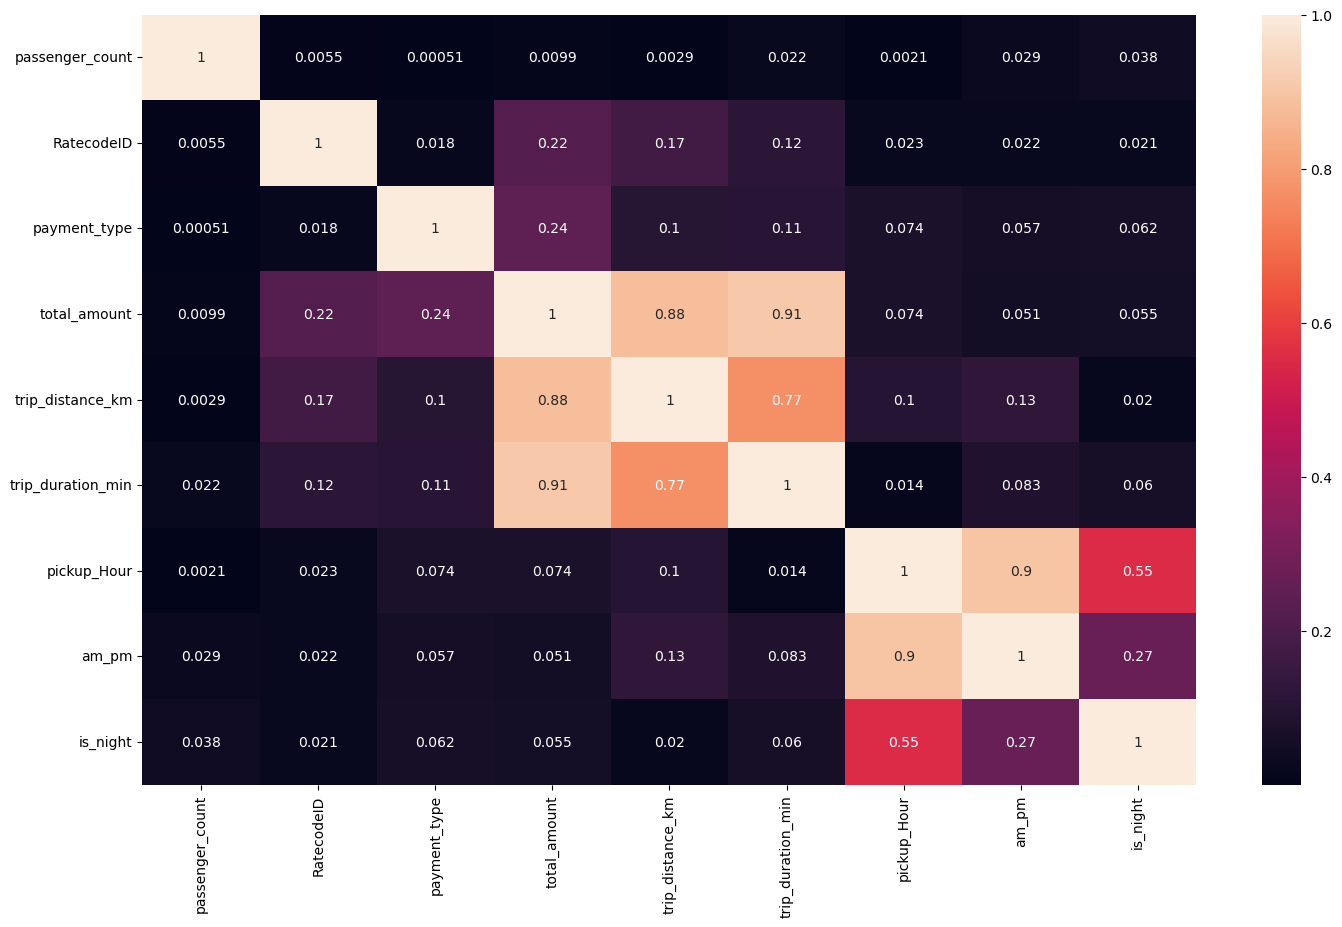

In [389]:
plt.figure(figsize=(17,10))
sns.heatmap(data.corr().abs(), annot=True)

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assume data is already cleaned and structured
# And categorical features are numeric codes in columns: RatecodeID, payment_type, am_pm, is_night

feature_cols = [
    'passenger_count',
    'RatecodeID',
    'payment_type',
    'trip_distance_km',
    'trip_duration_min',
    'pickup_Hour',
    'am_pm',
    'is_night'
]

X = data[feature_cols]
y = data['total_amount']  # your target

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train RF
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
feat_names = feature_cols
feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False)
print("Feature importances (numeric coding):")
print(feat_imp)

# Evaluate
y_pred = rf.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


In [ ]:
# relation between trip minutes vs total amt

C:\Users\Ajay\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


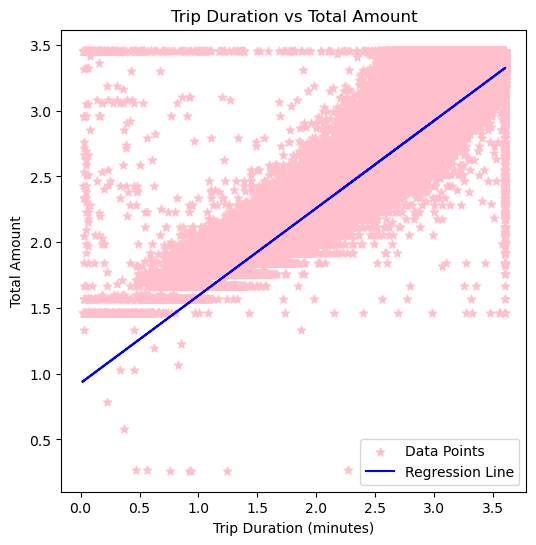

In [468]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Prepare the data
X = data[['trip_duration_min']]  # Independent variable
y = data['total_amount']         # Dependent variable

# Initialize and fit the linear regression model
lr = LinearRegression()
lr.fit(X, y)

# Predict the values
y_pred = lr.predict(X)

# Create the scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(X, y, color='pink', marker='*', label='Data Points')

# Plot the regression line
plt.plot(X, y_pred, color='blue', label='Regression Line')

# Labeling the axes
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Total Amount')
plt.title('Trip Duration vs Total Amount')

# Display the legend
plt.legend()

# Show the plot
plt.show()


# MODEL BUILDING

### Splitting X and Y

In [549]:
# Suppose data is your DataFrame, already cleaned and structured
# Features you want to use:
feature_cols = [
    'passenger_count',
    'RatecodeID',
    'payment_type',
    'trip_distance_km',
    'trip_duration_min',
    'pickup_Hour',
    'am_pm',
    'is_night'
]

X = data[feature_cols]
y = data['total_amount']  # target variable



### Split into train/test

In [556]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [584]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

167281 41821 167281 41821


In [557]:
X_train

,passenger_count,RatecodeID,payment_type,trip_distance_km,trip_duration_min,pickup_Hour,am_pm,is_night
156920,1,1,1,0.554989,1.661398,4,0,1
23716,5,1,1,0.800880,1.780586,4,0,1
35039,5,1,1,2.108152,3.603458,5,0,1
185158,1,1,1,0.684406,1.540445,5,0,1
157775,1,1,2,0.849109,2.877324,4,0,1
...,...,...,...,...,...,...,...,...
119879,1,1,1,1.902191,3.050852,2,0,1
103694,1,1,1,1.857414,2.702479,1,0,1
131932,1,2,1,2.108152,3.603458,3,0,1
146867,1,1,1,0.814713,2.523058,4,0,1


In [547]:
y_train

156920    1.994700
23716     2.116256
35039     3.455528
185158    1.996060
157775    2.624669
            ...   
119879    3.107274
103694    2.993229
131932    3.455528
146867    2.617396
121958    2.030776
Name: total_amount, Length: 167281, dtype: float64

In [408]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 1. Linear Regression

In [478]:

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)  
y_pred_lr = lr.predict(X_test)

print("Linear Regression Metrics")
print("R2:", r2_score(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))


Linear Regression Metrics
R2: 0.9319072450476412
MSE: 0.015072189322099278
RMSE: 0.12276884507927603
MAE: 0.07476846456690396


In [586]:
lr.coef_

array([ 4.67284621e-05,  1.49558525e-01, -1.39217460e-01,  3.67769527e-01,
        4.26818891e-01,  1.36530585e-04,  9.06839972e-02, -3.49974042e-03])

In [588]:
lr.intercept_

1.1135276873411664

In [590]:
lr.predict([[3,23,3,4,5,12,2,4]])

C:\Users\Ajay\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([7.91004152])

In [577]:
y_pred_train=lr.predict(X_train)

In [482]:
ss_res=np.sum((y_train - y_pred_train)**2)
ss_tot=np.sum((y_train - np.mean(y_train))**2)
R2_manual = 1-(ss_res / ss_tot)
print(ss_res)
print(ss_tot)
print(R2_manual)

2481.0003792341354
37127.21729414177
0.9331756980444207


In [488]:

train_r2=r2_score(y_train, y_pred_train)
test_r2=r2_score(y_test, y_pred_lr)
print(f'Training r2:{train_r2}')
print(f'Testing r2:{test_r2}')

Training r2:0.9331756980444207
Testing r2:0.9319072450476412


In [490]:
### Checking training and testing accuracy

train_mse=mean_squared_error(y_train, y_pred_train)
test_mse=mean_squared_error(y_test, y_pred_lr)
print(f'Training MSE:{train_mse}')
print(f'Testing MSE:{test_mse}')

Training MSE:0.014831333978360575
Testing MSE:0.015072189322099278


## 2. Ridge

In [531]:
#Ridge Regression
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=2.0)   # you’ll tune alpha later
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print("Ridge Regression Metrics")
print("R2:", r2_score(y_test, y_pred_ridge))
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("MAE:", mean_absolute_error(y_test, y_pred_ridge))


Ridge Regression Metrics
R2: 0.9319074336320512
MSE: 0.01507214757933336
RMSE: 0.1227686750736252
MAE: 0.07476885089699586


In [568]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Ridge model
ridge = Ridge(random_state=42)

# Param grid
ridge_params = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'fit_intercept': [True, False]
}
# GridSearchCV
ridge_grid = GridSearchCV(
    ridge,
    param_grid=ridge_params,
    scoring='r2',
    cv=3,
    n_jobs=-1,
    verbose=1)

ridge_grid.fit(X_train, y_train)

# Predictions
y_pred = ridge_grid.predict(X_test)

# Metrics
print("\n🔹 Ridge Regression")
print("Best Params:", ridge_grid.best_params_)
print("R2 Score   :", r2_score(y_test, y_pred))
print("MSE        :", mean_squared_error(y_test, y_pred))
print("RMSE       :", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE        :", mean_absolute_error(y_test, y_pred))

Fitting 3 folds for each of 10 candidates, totalling 30 fits

🔹 Ridge Regression
Best Params: {'alpha': 1, 'fit_intercept': True}
R2 Score   : 0.9319073397046116
MSE        : 0.015072168369976264
RMSE       : 0.12276875974765022
MAE        : 0.07476865731177287


## 3. Lasso

In [507]:
# Lasso Regression
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)  # initial choice; tune alpha
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

print("Lasso Regression Metrics")
print("R2:", r2_score(y_test, y_pred_lasso))
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("MAE:", mean_absolute_error(y_test, y_pred_lasso))


Lasso Regression Metrics
R2: 0.7336799264532023
MSE: 0.058949392950559294
RMSE: 0.2427949607190382
MAE: 0.1893130267569547


In [497]:
coeff=lasso.coef_
for i, c in enumerate(coeff):
    print(f'{feature_cols[i]}-----> {c}')

passenger_count-----> -0.0
RatecodeID-----> 0.0
payment_type-----> -0.0
trip_distance_km-----> 0.04078377215291235
trip_duration_min-----> 0.39901776625826474
pickup_Hour-----> 0.0032149116819203856
am_pm-----> 0.0
is_night-----> -0.0


## 4. Random Forest

In [633]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)  # for tree-based models, scaling not strictly needed
y_pred_rf = rf.predict(X_test)

print("Random Forest Metrics")
print("R2:", r2_score(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))


Random Forest Metrics
R2: 0.9631868573114227
MSE: 0.00814851237157165
RMSE: 0.09026911083849032
MAE: 0.052396329852042074


In [634]:
X_train

,passenger_count,RatecodeID,payment_type,trip_distance_km,trip_duration_min,pickup_Hour,am_pm,is_night
156920,1,1,1,0.554989,1.661398,4,0,1
23716,5,1,1,0.800880,1.780586,4,0,1
35039,5,1,1,2.108152,3.603458,5,0,1
185158,1,1,1,0.684406,1.540445,5,0,1
157775,1,1,2,0.849109,2.877324,4,0,1
...,...,...,...,...,...,...,...,...
119879,1,1,1,1.902191,3.050852,2,0,1
103694,1,1,1,1.857414,2.702479,1,0,1
131932,1,2,1,2.108152,3.603458,3,0,1
146867,1,1,1,0.814713,2.523058,4,0,1


In [637]:
y_train

156920    1.994700
23716     2.116256
35039     3.455528
185158    1.996060
157775    2.624669
            ...   
119879    3.107274
103694    2.993229
131932    3.455528
146867    2.617396
121958    2.030776
Name: total_amount, Length: 167281, dtype: float64

## 5. Gradient Bossting Regression

In [335]:
# Gradient Boosting Regression
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print("Gradient Boosting Metrics")
print("R2:", r2_score(y_test, y_pred_gb))
print("MSE:", mean_squared_error(y_test, y_pred_gb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gb)))
print("MAE:", mean_absolute_error(y_test, y_pred_gb))


Gradient Boosting Metrics
R2: 0.96550808239656
MSE: 0.0076347140391811496
RMSE: 0.08737685070532783
MAE: 0.052934107877039935


## Hyperparameter tuning for random forest

In [596]:
data['RatecodeID'].value_counts()

RatecodeID
1    204491
2      3762
3       424
5       337
4        87
6         1
Name: count, dtype: int64

In [509]:
data.shape

(209102, 9)

In [537]:
# Hyperparameter tuning for Random Forest
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
}

grid_rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42), 
    param_grid=param_grid, 
    cv=3, 
    scoring='neg_mean_squared_error', 
    n_jobs=-1,   # using all the available cpu simultaneously
    verbose=True
)
grid_rf.fit(X_train, y_train)

print("Best params:", grid_rf.best_params_)
best_rf = grid_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

print("Best RF Metrics")
print("R2:", r2_score(y_test, y_pred_best_rf))
print("MSE:", mean_squared_error(y_test, y_pred_best_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best_rf)))
print("MAE:", mean_absolute_error(y_test, y_pred_best_rf))





Fitting 3 folds for each of 108 candidates, totalling 324 fits


C:\Users\Ajay\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 324.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Ajay\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ajay\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Ajay\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 489, in fit
    trees = Parallel(
   

Best params: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best RF Metrics
R2: 0.9666723233094823
MSE: 0.007377011740774011
RMSE: 0.0858895321955709
MAE: 0.049710333681332326


In [560]:
grid_rf.best_score_

-0.007105296803256081

In [562]:
grid_rf.best_params_

{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 200}

In [564]:
grid_rf.cv

3

In [566]:
grid_rf.best_estimator_

RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                      n_estimators=200, random_state=42)

## Pickling

In [ ]:
# Here, Random forest is performing well using hyperparameter tuning. 
# Therefore pickling the best model based the model accuracy.

In [600]:
X_train.sample()

,passenger_count,RatecodeID,payment_type,trip_distance_km,trip_duration_min,pickup_Hour,am_pm,is_night
116506,1,1,1,1.404084,2.83615,2,0,1


In [ ]:
import pickle

with open('lr.pkl', 'wb') as file:
    pickle.dump(lr, file)

In [ ]:
# Here I am pickling the best performing Model.

# Tunned Random Forest provide us 96% Accuracy.


In [570]:
import pickle

with open('grid_rf.pkl', 'wb') as file:
    pickle.dump(grid_rf, file)

In [629]:
import pickle

with open('rf.pkl', 'wb') as file:
    pickle.dump(rf, file)

In [631]:
rf

RandomForestRegressor(n_jobs=-1, random_state=42)